In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

In [9]:
x_train = pd.read_csv('data/x_train.csv.gz', compression='gzip', header=None, delimiter=';')
y_train = pd.read_csv('data/y_train.csv.gz', compression='gzip', header=None, delimiter=';')
y_train.columns=['target']

In [20]:
train = pd.concat([x_train, y_train], axis=1)
print(train.shape)
train.head()

(3489, 224)


,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,target
0,-1.351735,1.502242,2.049512,0.437597,0.243818,4.982503,-1.493039,1.868572,1.435876,3.594717,...,-0.789066,4.193481,2.803058,0.685003,3.204492,3.528085,4.877951,0.937529,0.730470,2
1,2.810473,1.312591,1.392652,0.163840,0.654384,-2.725782,3.195347,1.910067,0.321657,0.256354,...,4.913119,-1.182302,1.540444,0.563015,1.976227,0.854290,0.490507,-0.190323,1.244596,3
2,2.328788,-1.928459,-2.064532,0.731323,0.117712,-1.567757,2.961654,-3.013697,0.185553,5.821898,...,1.991433,-2.514600,-2.660716,1.124836,-2.993835,-1.519144,1.851507,0.058385,0.706138,2
3,-0.128106,-2.072688,-2.407602,0.978550,0.111442,2.608775,-1.299084,-1.919077,1.566608,2.349346,...,-2.896897,-1.639309,-2.186183,-0.097270,-3.085381,-0.802771,4.713787,0.943972,-0.320782,1
4,1.886821,0.757923,-0.097547,0.465719,0.621116,-0.332968,2.446465,-0.143173,0.032383,0.837508,...,1.320251,0.447317,-0.103243,1.285391,-0.445947,-0.459055,-2.744683,0.620512,1.166808,2


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3489 entries, 0 to 3488
Columns: 224 entries, 0 to target
dtypes: float64(223), int64(1)
memory usage: 6.0 MB


In [46]:
train.describe()

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,target
count,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,...,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000,3489.000000
mean,0.494704,0.516275,0.509534,0.496653,0.498532,0.511081,0.489582,0.517844,0.501379,3.018297,...,0.488314,0.508792,0.516152,0.491506,0.520646,0.513619,0.491074,0.487143,0.494403,1.831184
std,1.344987,1.517720,1.944892,0.304816,0.288103,2.168340,1.745869,2.061410,0.455960,1.852894,...,2.066324,2.231573,1.893010,0.663052,2.859162,1.640211,2.798898,0.759490,0.504922,0.852944
min,-2.218093,-3.049841,-3.644502,-0.103472,0.000202,-6.311034,-3.112771,-3.924850,-0.567797,-1.517063,...,-5.978127,-6.095323,-3.873535,-1.449840,-5.190807,-4.348962,-6.242872,-1.650250,-0.805370,0.000000
25%,-0.589310,-0.527882,-0.794563,0.237865,0.256838,-1.053578,-0.971074,-0.899595,0.181897,1.547495,...,-1.013490,-1.243487,-0.799890,0.035183,-1.551566,-0.692253,-1.507348,-0.081461,0.125037,1.000000
50%,0.280815,0.596674,0.590149,0.497017,0.499785,0.473108,0.188150,0.578649,0.473828,2.731865,...,0.275163,0.153479,0.545157,0.458264,0.357019,0.398614,0.095635,0.486496,0.457783,2.000000
75%,1.416563,1.605525,1.862141,0.748879,0.749846,2.052051,1.711705,1.955837,0.778593,4.174919,...,1.845097,2.052449,1.817626,0.903188,2.460358,1.660167,2.295469,1.039252,0.821512,2.000000
max,4.744402,6.223512,8.318870,2.032806,0.999830,10.749737,6.003011,9.384850,3.594312,10.741713,...,8.144853,8.391595,8.026214,3.419200,16.147908,8.265469,15.120344,3.239605,2.108298,4.000000


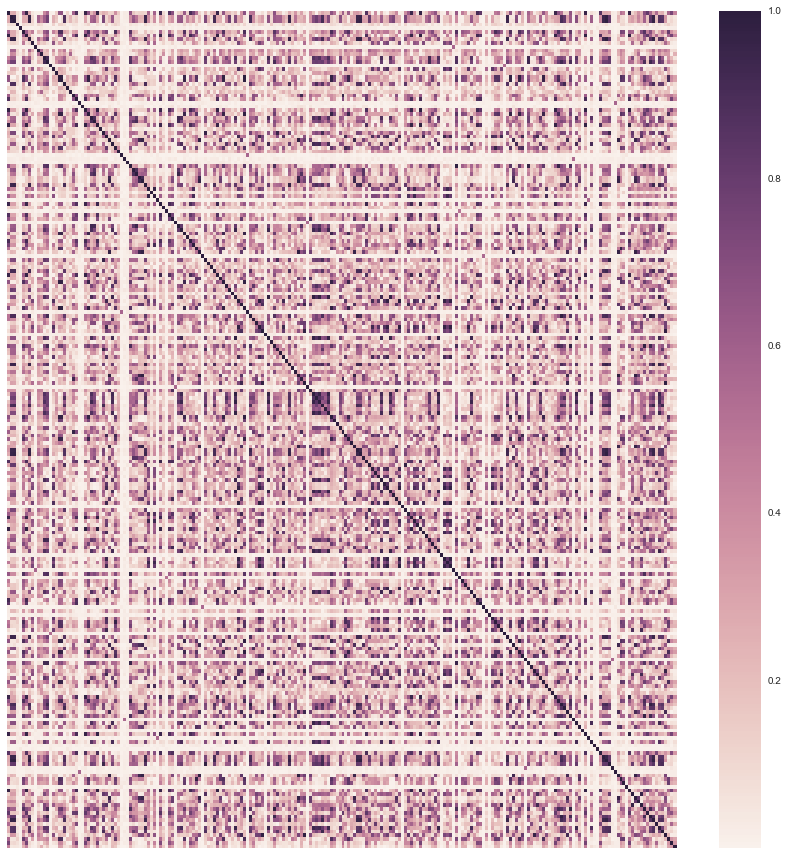

In [28]:
plt.subplots(figsize=(15,15))
sns.heatmap(np.abs(train.corr()), yticklabels=False, xticklabels=False)

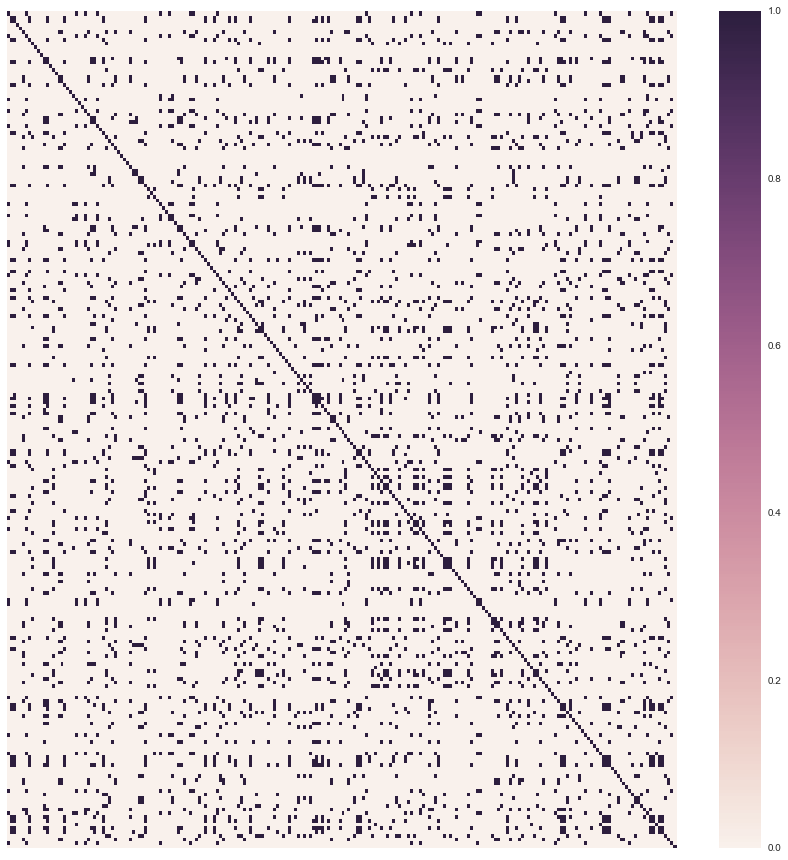

In [43]:
plt.subplots(figsize=(15,15))
sns.heatmap(np.abs(train.corr()) >= 0.7, yticklabels=False, xticklabels=False)

In [47]:
tsne = TSNE(n_components=2, init='pca')
x = tsne.fit_transform(x_train)

In [31]:
def draw(x, labels):
    plt.subplots(figsize=(10,10))
    colors = cm.rainbow(np.linspace(0, 1, len(set(labels))))
    for y_, c in zip(set(labels), colors):
        plt.scatter(x[labels==y_, 0],
                    x[labels==y_, 1], c=c, alpha=0.5, label=str(y_))

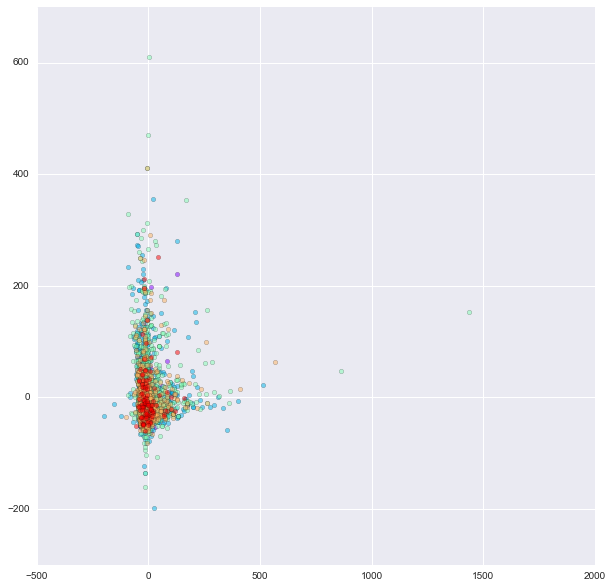

In [48]:
draw(x, y_train.target)